In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import *
%matplotlib inline

In [143]:
x,y = sklearn.datasets.make_regression(n_features=1,n_samples=100,noise=100)
y = y.reshape((-1,1))
y = (y-np.mean(y))/np.std(y)

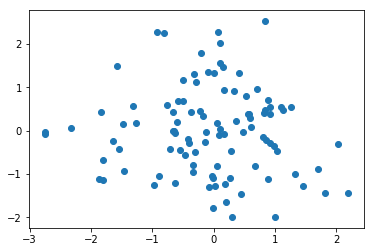

In [144]:
plt.scatter(x,y)

### MLE

First I try the MLE approach to linear regression.  We assume that we have a model y=f(x) + eps, where eps is from a standard normal distribution.  This means that our likelihood, p(y|x,w), is from a normal distribution with mean wX.  The MLE approach to finding the optimal w would be to find the w that maximizes our log likelihood.  Since the maximum is the same for the log function, we can maximize the log likelihood.


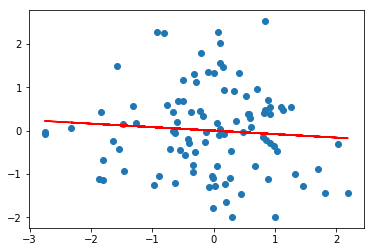

In [145]:
w_mle = np.dot( np.linalg.inv(np.dot(np.transpose(x),x)), np.dot(np.transpose(x),y) )
pred = w_mle*x
plt.scatter(x,y)
plt.plot(x,pred,color='r')

### Bayesian

Now, instead of finding the MLE, we want to have a bayesian formulation to linear regression.  To do this, we put a prior on our weights.  Our weights come from a normal distribution with mean mu and variance sigma^2.  Now, we can calculate a posterior over our weights and then sample from that posterior.  This means that we have an essentially infinite number of weight-sets!

Our posterior is rather complex and requires us to factorize out a difficult sum.  It does, however, end up becoming a normal distribution with calculated mean and variance, scaled by a normalizing parameter.

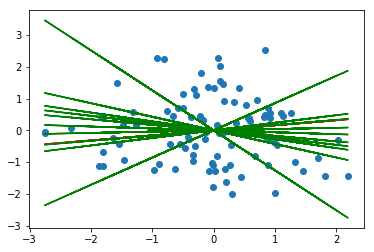

In [146]:
mu = 0
var = 1.0

#sample w
w = np.random.normal(mu,var)
mean = np.dot(x.transpose(),y)+ mu*var
sigma = np.dot(x.transpose(),x) + mu
w_bayesian = np.random.normal(mean,sigma) * (1/ (np.sqrt(2*np.pi) * sigma))
w_b = np.random.normal(mean.flatten()[0],sigma.flatten()[0],size=10) * (1/ (np.sqrt(2*np.pi) * sigma.flatten()[0]))

pred=w_bayesian*x
plt.scatter(x,y)
plt.plot(x,pred,color='r')

for nw in w_b:
    plt.plot(x,nw*x,color='g')